# Lithium Ion Battery Capacity Estimation using Autoencoders and Ensemble Learning

#### Author: Susmitha Ganesh

## Model File

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
# load X_list_B005.npy, Y_list_B005.npy, X_list_B006.npy, Y_list_B006.npy, X_list_B007.npy, Y_list_B007.npy, X_list_B018.npy, Y_list_B018.npy from drive

import numpy as np

X_list_B005 = np.load('/content/drive/MyDrive/X_list_B005.npy')
Y_list_B005 = np.load('/content/drive/MyDrive/Y_list_B005.npy')
X_list_B006 = np.load('/content/drive/MyDrive/X_list_B006.npy')
Y_list_B006 = np.load('/content/drive/MyDrive/Y_list_B006.npy')
X_list_B007 = np.load('/content/drive/MyDrive/X_list_B007.npy')
Y_list_B007 = np.load('/content/drive/MyDrive/Y_list_B007.npy')
X_list_B018 = np.load('/content/drive/MyDrive/X_list_B018.npy')
Y_list_B018 = np.load('/content/drive/MyDrive/Y_list_B018.npy')

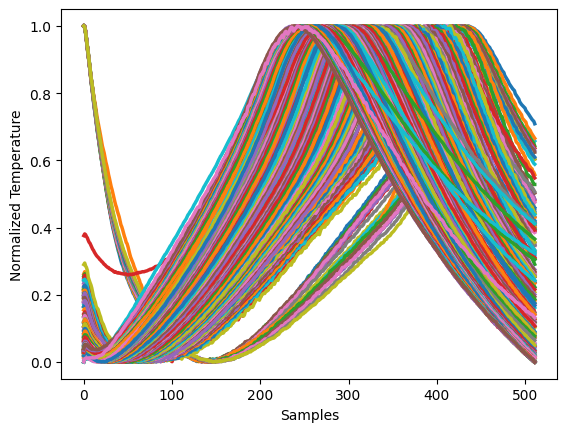

In [17]:
for i in range(len(X_list_B005)):
  plt.plot(X_list_B005[i, :, 1],linewidth=2.5)
plt.xlabel('Samples')
plt.ylabel('Normalized Temperature')
plt.show()

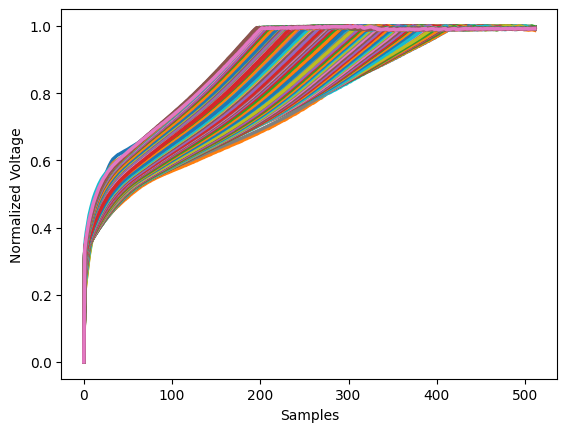

In [18]:
for i in range(len(X_list_B005)):
  plt.plot(X_list_B005[i, :, 0],linewidth=2.5)
plt.xlabel('Samples')
plt.ylabel('Normalized Voltage')
plt.show()

Autoencoder

In [ ]:
#required libraries

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, UpSampling1D, Dense, Dropout, Flatten

In [ ]:
from tensorflow.keras.models import Model

class Autoencoder(Model):
    def __init__(self):
        super(Autoencoder, self).__init__()

        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Conv1D(16,4,4,padding = 'same', activation = 'relu', input_shape = [512,2]),
            tf.keras.layers.MaxPooling1D(2),
            tf.keras.layers.Conv1D(16,2,2,padding = 'same', activation = 'relu'),
            tf.keras.layers.MaxPooling1D(2),
            tf.keras.layers.Conv1D(32,1,padding = 'same', activation = 'relu'),
            tf.keras.layers.MaxPooling1D(2),
            tf.keras.layers.Conv1D(32,1,padding = 'same', activation = 'relu'),
            tf.keras.layers.MaxPooling1D(2),
        ])
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Conv1DTranspose(32,2,2,input_shape = [4,32], padding = 'same'),
            tf.keras.layers.Conv1DTranspose(16,2,2,padding = 'same'),
            tf.keras.layers.Conv1DTranspose(16,4,4,padding = 'same'),
            tf.keras.layers.Conv1DTranspose(2,8,8,padding = 'same'),
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [ ]:
from tensorflow.keras import losses
autoencoder = Autoencoder()
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv_transpose.py:94: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Required Libraries for GRU Unit

In [ ]:
#import necessary libraries

from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError

In [ ]:
!pip install scikeras[tensorflow]

In [ ]:
#import necessary libraries

from sklearn.ensemble import AdaBoostRegressor
from scikeras.wrappers import KerasRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

CLIENT 1


In [ ]:
# Create X and Y using B0005 data
X_Train_Client1 = X_list_B005
Y_Train_Client1 = Y_list_B005
print(X_Train_Client1.shape)
print(Y_Train_Client1.shape)

(167, 512, 2)
(167,)


In [ ]:
autoencoder_Client1 = Autoencoder()
autoencoder_Client1.compile(optimizer='adam', loss=losses.MeanSquaredError())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv_transpose.py:94: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
# Autoencoder
autoencoder_Client1.fit(X_Train_Client1, X_Train_Client1,
                epochs=200, batch_size=5,
                shuffle=False)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.4381
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1216
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0379
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0333
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0316
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0306
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0298
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0288
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0279
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0269
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0259
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0247
Epoch 13/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0233
Epoch 14/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0216
Epoch 15/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0196
Epoc

In [ ]:
encoded_imgs_Client1 = autoencoder_Client1.encoder(X_Train_Client1).numpy()
decoded_imgs_Client1 = autoencoder_Client1.decoder(encoded_imgs_Client1).numpy()

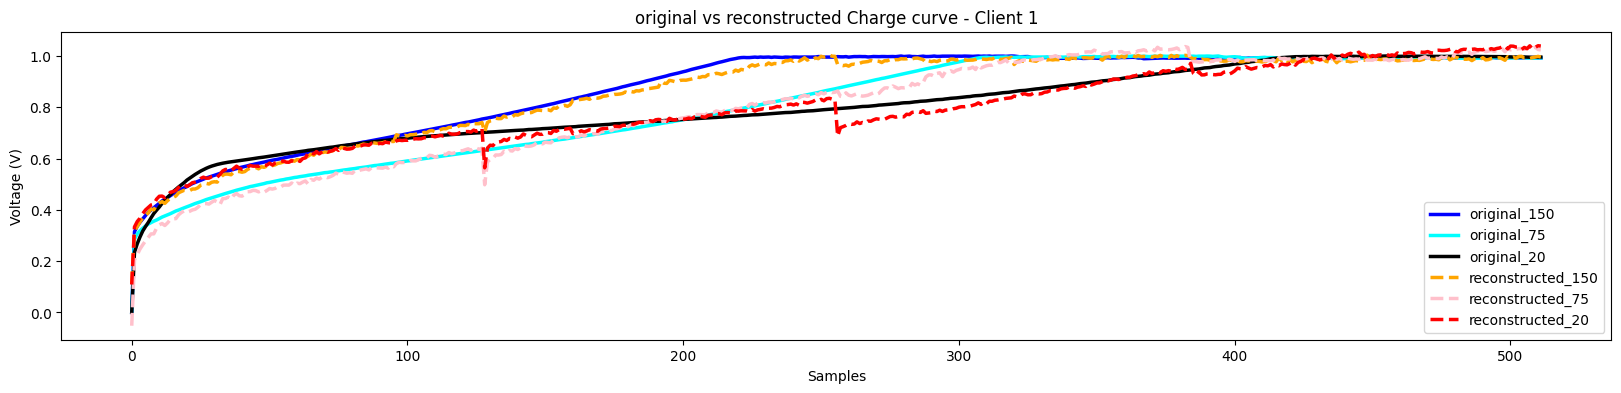

In [ ]:
plt.figure(figsize=(20, 4))
plt.plot(X_Train_Client1[150, :, 0],color='blue', linewidth=2.5)
plt.plot(X_Train_Client1[75, :, 0],color='cyan', linewidth=2.5)
plt.plot(X_Train_Client1[20, :, 0],color='black', linewidth=2.5)

plt.gray()
plt.plot(decoded_imgs_Client1[150, :, 0], '--', color='orange', linewidth=2.5)
plt.plot(decoded_imgs_Client1[75, :, 0], '--', color='pink', linewidth=2.5)
plt.plot(decoded_imgs_Client1[20, :, 0], '--', color='red', linewidth=2.5)
plt.title("original vs reconstructed Charge curve - Client 1")
plt.legend(['original_150','original_75','original_20', 'reconstructed_150','reconstructed_75','reconstructed_20'])
plt.xlabel('Samples')
plt.ylabel('Voltage (V)')
plt.gray()
plt.show()

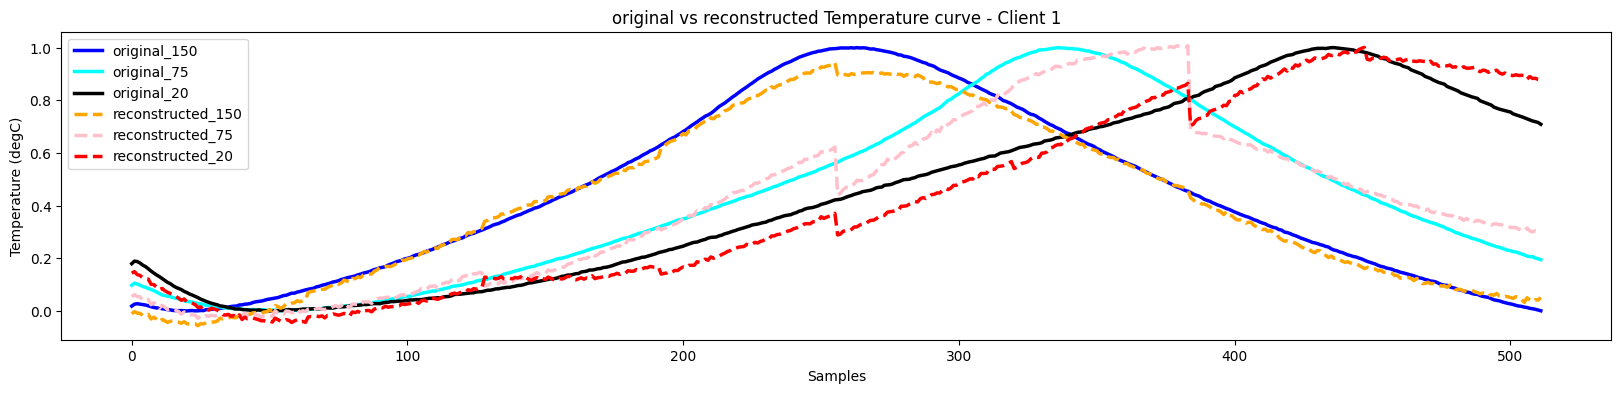

In [ ]:
plt.figure(figsize=(20, 4))
plt.plot(X_Train_Client1[150, :, 1],color='blue', linewidth=2.5)
plt.plot(X_Train_Client1[75, :, 1],color='cyan', linewidth=2.5)
plt.plot(X_Train_Client1[20, :, 1],color='black', linewidth=2.5)

plt.gray()
plt.plot(decoded_imgs_Client1[150, :, 1], '--', color='orange', linewidth=2.5)
plt.plot(decoded_imgs_Client1[75, :, 1], '--', color='pink', linewidth=2.5)
plt.plot(decoded_imgs_Client1[20, :, 1], '--', color='red', linewidth=2.5)
plt.title("original vs reconstructed Temperature curve - Client 1")
plt.legend(['original_150','original_75','original_20', 'reconstructed_150','reconstructed_75','reconstructed_20'])
plt.xlabel('Samples')
plt.ylabel('Temperature (degC)')
plt.gray()
plt.show()

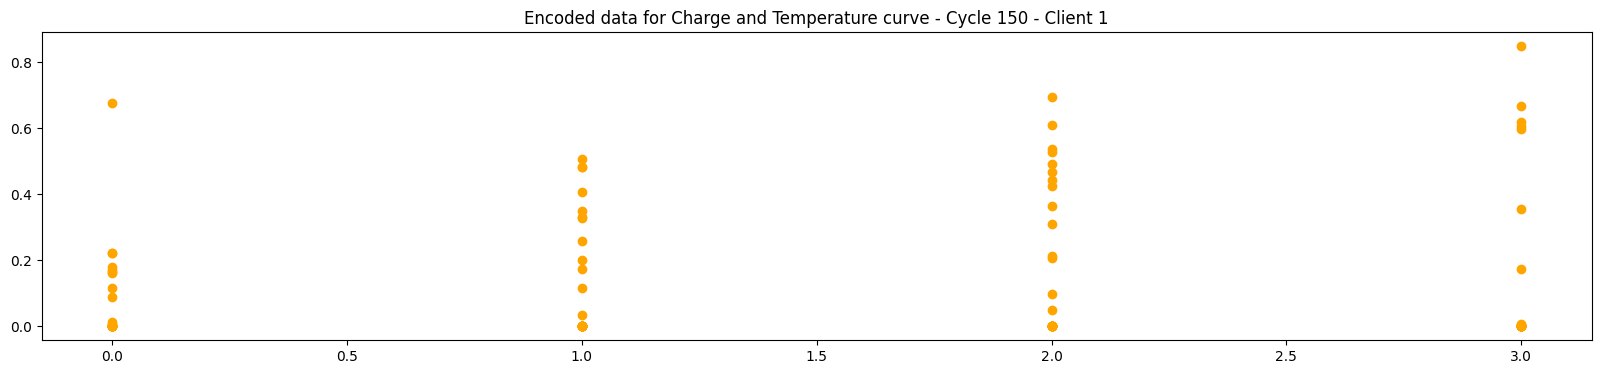

In [ ]:
plt.figure(figsize=(20, 4))
plt.plot(encoded_imgs_Client1[150, :], 'o', color='orange', linewidth=2.5)
plt.title("Encoded data for Charge and Temperature curve - Cycle 150 - Client 1")
plt.show()

In [ ]:
X_Train_Client1 = encoded_imgs_Client1
Y_Train_Client1 = Y_Train_Client1
print(X_Train_Client1.shape)
print(Y_Train_Client1.shape)

(167, 4, 32)
(167,)


In [ ]:
# Base GRU model
Base_GRU_model1 = Sequential()
Base_GRU_model1.add(GRU(units=128, return_sequences=True, input_shape=(X_Train_Client1.shape[1], X_Train_Client1.shape[2])))
Base_GRU_model1.add(GRU(units=128, return_sequences=True))
Base_GRU_model1.add(GRU(units=128))
Base_GRU_model1.add(Dropout(0.5))
Base_GRU_model1.add(Dense(1)) # Output Layer

# Compile the Base model, since the Adaboost Regressor wrapper needs a compiled model.
optimizer = Adam(learning_rate=0.001)
Base_GRU_model1.compile(optimizer=optimizer, loss=MeanSquaredError(), metrics=[tf.keras.metrics.RootMeanSquaredError()])

#Wrapper
gru_regressor1 = KerasRegressor(build_fn= Base_GRU_model1,
                               epochs=200,
                               batch_size=256,
                               verbose=1)
# GRU base model + adaboost
model1 = AdaBoostRegressor(estimator= gru_regressor1, n_estimators=5, learning_rate=1, random_state = 21)




/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model1.fit(X_Train_Client1, Y_Train_Client1)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 24 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2.5027 - root_mean_squared_error: 1.5820
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 2.0141 - root_mean_squared_error: 1.4192
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 1.5727 - root_mean_squared_error: 1.2541
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 1.0960 - root_mean_squared_error: 1.0469
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.6508 - root_mean_squared_error: 0.8067
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.2928 - root_mean_squared_error: 0.5411
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1088 - root_mean_squared_error: 0.3299
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3018 - root_mean_squared_error: 0.5494
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.5398 - root_mean_squared_error: 0.7347
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.4231 - root_mean_squared_error: 0.6504
Epoch 11/200
1/1 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 24 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 2.5351 - root_mean_squared_error: 1.5922
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 2.0514 - root_mean_squared_error: 1.4323
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 1.5698 - root_mean_squared_error: 1.2529
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 1.1222 - root_mean_squared_error: 1.0594
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.6691 - root_mean_squared_error: 0.8180
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.3043 - root_mean_squared_error: 0.5517
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.1161 - root_mean_squared_error: 0.3407
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.2729 - root_mean_squared_error: 0.5224
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.5203 - root_mean_squared_error: 0.7213
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - loss: 0.4701 - root_mean_squared_error: 0.6856
Epoch 11/200
1/1 ━━

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 24 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2.6452 - root_mean_squared_error: 1.6264
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 2.1526 - root_mean_squared_error: 1.4672
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 1.6970 - root_mean_squared_error: 1.3027
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 1.2465 - root_mean_squared_error: 1.1165
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.7618 - root_mean_squared_error: 0.8728
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.3865 - root_mean_squared_error: 0.6217
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.1319 - root_mean_squared_error: 0.3632
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2742 - root_mean_squared_error: 0.5236
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.5170 - root_mean_squared_error: 0.7190
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.5053 - root_mean_squared_error: 0.7109
Epoch 11/200
1/1 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 24 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 2.7424 - root_mean_squared_error: 1.6560
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 2.2279 - root_mean_squared_error: 1.4926
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 1.7605 - root_mean_squared_error: 1.3268
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 1.2661 - root_mean_squared_error: 1.1252
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.8055 - root_mean_squared_error: 0.8975
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3894 - root_mean_squared_error: 0.6240
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1234 - root_mean_squared_error: 0.3513
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.2505 - root_mean_squared_error: 0.5005
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.5216 - root_mean_squared_error: 0.7222
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.5283 - root_mean_squared_error: 0.7268
Epoch 11/200
1/1 ━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 24 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2.7043 - root_mean_squared_error: 1.6445
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 2.2102 - root_mean_squared_error: 1.4867
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1.7090 - root_mean_squared_error: 1.3073
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 1.2517 - root_mean_squared_error: 1.1188
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.7787 - root_mean_squared_error: 0.8824
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.3851 - root_mean_squared_error: 0.6206
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.1393 - root_mean_squared_error: 0.3732
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.2482 - root_mean_squared_error: 0.4982
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.5287 - root_mean_squared_error: 0.7271
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.5612 - root_mean_squared_error: 0.7492
Epoch 11/200
1/1 ━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


AdaBoostRegressor(estimator=KerasRegressor(batch_size=256, build_fn=<Sequential name=sequential_4, built=True>, epochs=200),
                  learning_rate=1, n_estimators=5, random_state=21)

In [ ]:
estimator_weights = model1.estimator_weights_
estimator_weights

array([1.30517476, 0.75553319, 0.96688996, 0.18107654, 0.58799249])

In [ ]:
Y_pred_Client1 = model1.predict(X_Train_Client1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


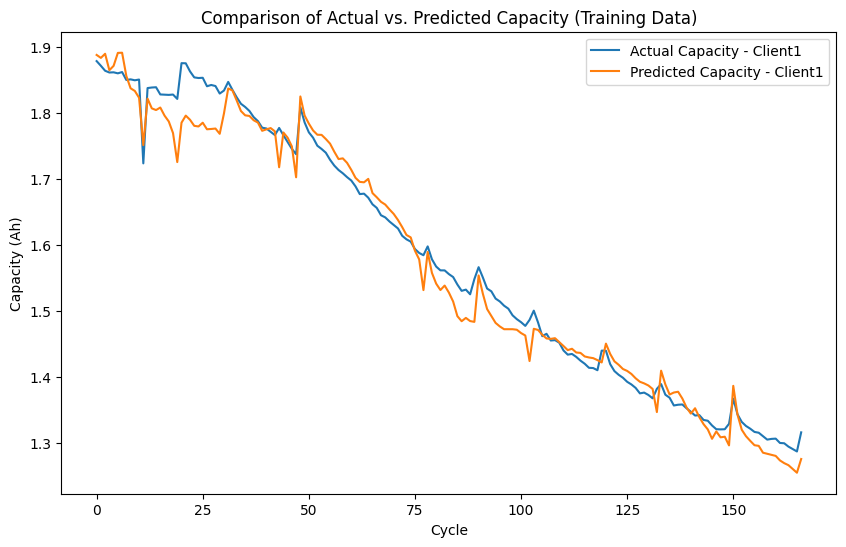

RMSE: 0.0292
MAE: 0.0225


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Y_Train_Client1, label='Actual Capacity - Client1')
plt.plot(Y_pred_Client1, label='Predicted Capacity - Client1')
plt.xlabel('Cycle')
plt.ylabel('Capacity (Ah)')
plt.title('Comparison of Actual vs. Predicted Capacity (Training Data)')
plt.legend()
plt.show()

# Calculate metrics like RMSE and MAE for further analysis
rmse = np.sqrt(mean_squared_error(Y_Train_Client1, Y_pred_Client1))
mae = mean_absolute_error(Y_Train_Client1, Y_pred_Client1)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

CLIENT 2

In [ ]:
# Create X and Y using B0007 data
X_Train_Client2 = X_list_B007
Y_Train_Client2 = Y_list_B007
print(X_Train_Client2.shape)
print(Y_Train_Client2.shape)

(167, 512, 2)
(167,)


In [ ]:
autoencoder_Client2 = Autoencoder()
autoencoder_Client2.compile(optimizer='adam', loss=losses.MeanSquaredError())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv_transpose.py:94: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
# Autoencoder
autoencoder_Client2.fit(X_Train_Client2, X_Train_Client2,
                epochs=200, batch_size=5,
                shuffle=False)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4184
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1282
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0388
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0351
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0347
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0342
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0334
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0322
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0309
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0292
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0274
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0256
Epoch 13/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0232
Epoch 14/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0204
Epoch 15/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0180
Epoc

In [ ]:
encoded_imgs_Client2 = autoencoder_Client2.encoder(X_Train_Client2).numpy()
decoded_imgs_Client2 = autoencoder_Client2.decoder(encoded_imgs_Client2).numpy()

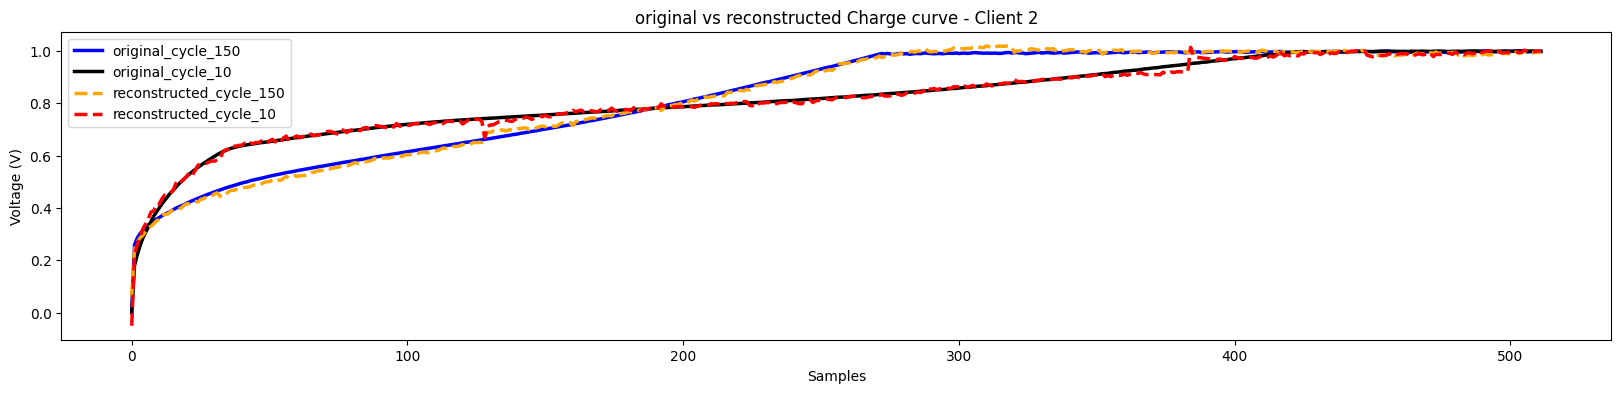

In [ ]:
plt.figure(figsize=(20, 4))
plt.plot(X_Train_Client2[150, :, 0],color='blue', linewidth=2.5)
# plt.plot(X_Train_Client2[75, :, 0],color='cyan', linewidth=2.5)
plt.plot(X_Train_Client2[10, :, 0],color='black', linewidth=2.5)
plt.gray()
plt.plot(decoded_imgs_Client2[150, :, 0], '--', color='orange', linewidth=2.5)
# plt.plot(decoded_imgs_Client2[75, :, 0], '--', color='green',linewidth=2.5)
plt.plot(decoded_imgs_Client2[10, :, 0], '--', color='red', linewidth=2.5)
plt.title("original vs reconstructed Charge curve - Client 2")
plt.legend(['original_cycle_150', 'original_cycle_10','reconstructed_cycle_150', 'reconstructed_cycle_10'])
plt.xlabel('Samples')
plt.ylabel('Voltage (V)')
plt.gray()
plt.show()

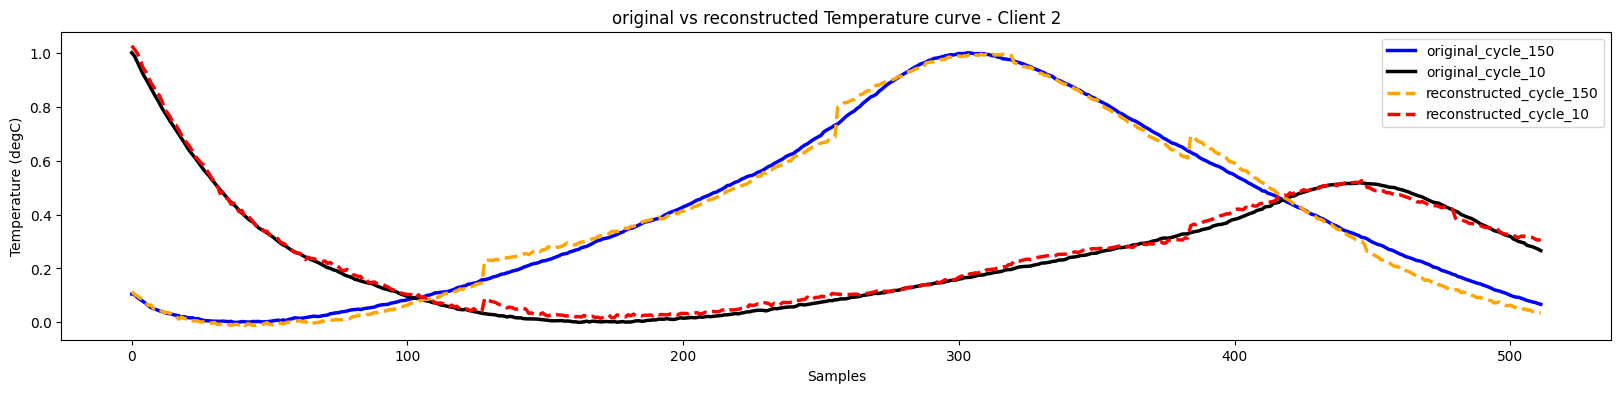

In [ ]:
plt.figure(figsize=(20, 4))
plt.plot(X_Train_Client2[150, :, 1], color='blue', linewidth=2.5)
plt.plot(X_Train_Client2[10, :, 1], color='black', linewidth=2.5)
plt.gray()
plt.plot(decoded_imgs_Client2[150, :, 1], '--', color='orange', linewidth=2.5)
plt.plot(decoded_imgs_Client2[10, :, 1], '--', color='red', linewidth=2.5)
plt.title("original vs reconstructed Temperature curve - Client 2")
plt.legend(['original_cycle_150', 'original_cycle_10','reconstructed_cycle_150', 'reconstructed_cycle_10'])
plt.xlabel('Samples')
plt.ylabel('Temperature (degC)')
plt.gray()
plt.show()

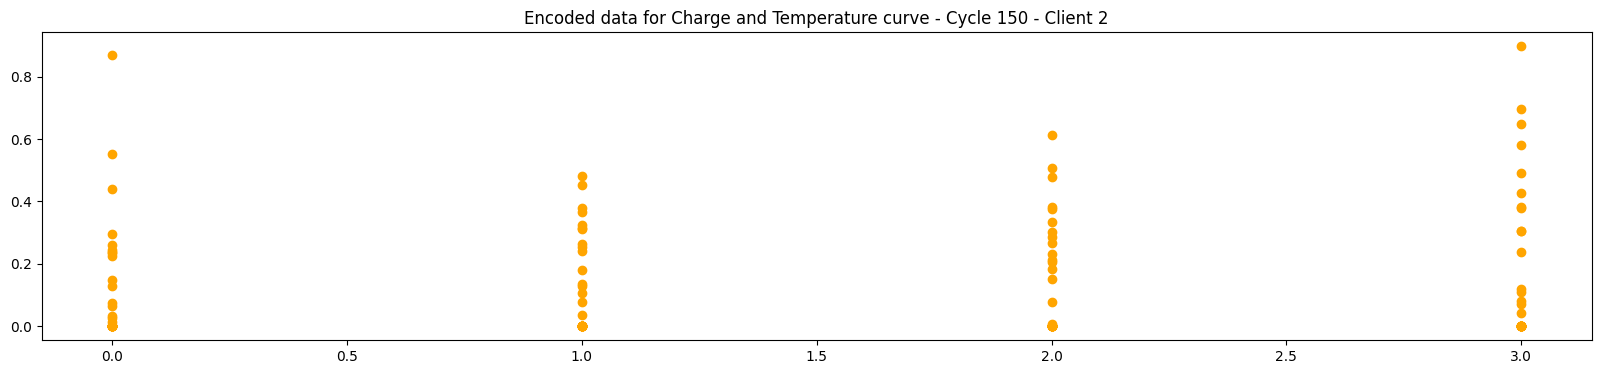

In [ ]:
plt.figure(figsize=(20, 4))
plt.plot(encoded_imgs_Client2[150, :], 'o', color='orange', linewidth=2.5)
plt.title("Encoded data for Charge and Temperature curve - Cycle 150 - Client 2")
plt.show()

In [ ]:
X_Train_Client2 = encoded_imgs_Client2
Y_Train_Client2 = Y_Train_Client2
print(X_Train_Client2.shape)
print(Y_Train_Client2.shape)

(167, 4, 32)
(167,)


In [ ]:
# Base GRU model
Base_GRU_model2 = Sequential()
Base_GRU_model2.add(GRU(units=128, return_sequences=True, input_shape=(X_Train_Client2.shape[1], X_Train_Client2.shape[2])))
Base_GRU_model2.add(GRU(units=128, return_sequences=True))
Base_GRU_model2.add(GRU(units=128))
Base_GRU_model2.add(Dropout(0.5))
Base_GRU_model2.add(Dense(1)) # Output Layer

# Compile the Base model, since the Adaboost Regressor wrapper needs a compiled model.
optimizer = Adam(learning_rate=0.001)
Base_GRU_model2.compile(optimizer=optimizer, loss=MeanSquaredError(), metrics=[tf.keras.metrics.RootMeanSquaredError()])

#Wrapper
gru_regressor2 = KerasRegressor(build_fn= Base_GRU_model2,
                               epochs=200,
                               batch_size=256,
                               verbose=1)
# GRU base model + adaboost
model2 = AdaBoostRegressor(estimator= gru_regressor2, n_estimators=5, learning_rate=1, random_state = 21)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model2.fit(X_Train_Client2, Y_Train_Client2)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 24 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2.7661 - root_mean_squared_error: 1.6632
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 2.1301 - root_mean_squared_error: 1.4595
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1.5844 - root_mean_squared_error: 1.2587
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 1.0336 - root_mean_squared_error: 1.0167
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.5784 - root_mean_squared_error: 0.7606
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.1870 - root_mean_squared_error: 0.4324
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0767 - root_mean_squared_error: 0.2769
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.4023 - root_mean_squared_error: 0.6343
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.5363 - root_mean_squared_error: 0.7323
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.4175 - root_mean_squared_error: 0.6461
Epoch 11/200
1/1 ━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 24 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 2.7564 - root_mean_squared_error: 1.6603
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 2.1390 - root_mean_squared_error: 1.4625
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 1.5884 - root_mean_squared_error: 1.2603
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 1.0297 - root_mean_squared_error: 1.0147
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.5401 - root_mean_squared_error: 0.7349
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.1737 - root_mean_squared_error: 0.4168
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 0.0987 - root_mean_squared_error: 0.3142
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.3800 - root_mean_squared_error: 0.6164
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.5210 - root_mean_squared_error: 0.7218
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.4186 - root_mean_squared_error: 0.6470
Epoch 11/200
1/1 ━━

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 24 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2.8803 - root_mean_squared_error: 1.6972
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 2.2655 - root_mean_squared_error: 1.5052
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1.7181 - root_mean_squared_error: 1.3108
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 1.1806 - root_mean_squared_error: 1.0865
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.6288 - root_mean_squared_error: 0.7930
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.2108 - root_mean_squared_error: 0.4591
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0849 - root_mean_squared_error: 0.2913
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.4205 - root_mean_squared_error: 0.6484
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.5798 - root_mean_squared_error: 0.7615
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.3983 - root_mean_squared_error: 0.6311
Epoch 11/200
1/1 ━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 24 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 2.9406 - root_mean_squared_error: 1.7148
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 2.3133 - root_mean_squared_error: 1.5210
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 1.7472 - root_mean_squared_error: 1.3218
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 1.1831 - root_mean_squared_error: 1.0877
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 0.6576 - root_mean_squared_error: 0.8109
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.2394 - root_mean_squared_error: 0.4893
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 0.0834 - root_mean_squared_error: 0.2888
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.4024 - root_mean_squared_error: 0.6343
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.5595 - root_mean_squared_error: 0.7480
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.4309 - root_mean_squared_error: 0.6565
Epoch 11/200
1

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 24 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2.9340 - root_mean_squared_error: 1.7129
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 2.3390 - root_mean_squared_error: 1.5294
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 1.7445 - root_mean_squared_error: 1.3208
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 1.1802 - root_mean_squared_error: 1.0864
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.6427 - root_mean_squared_error: 0.8017
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.2432 - root_mean_squared_error: 0.4931
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0768 - root_mean_squared_error: 0.2772
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.3882 - root_mean_squared_error: 0.6231
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.6381 - root_mean_squared_error: 0.7988
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.3993 - root_mean_squared_error: 0.6319
Epoch 11/200
1/1 ━━━━

AdaBoostRegressor(estimator=KerasRegressor(batch_size=256, build_fn=<Sequential name=sequential_7, built=True>, epochs=200),
                  learning_rate=1, n_estimators=5, random_state=21)

In [ ]:
estimator_weights = model2.estimator_weights_
estimator_weights

array([1.30665866, 1.58981678, 0.85765956, 0.71765631, 0.62630152])

In [ ]:
Y_pred_Client2 = model2.predict(X_Train_Client2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


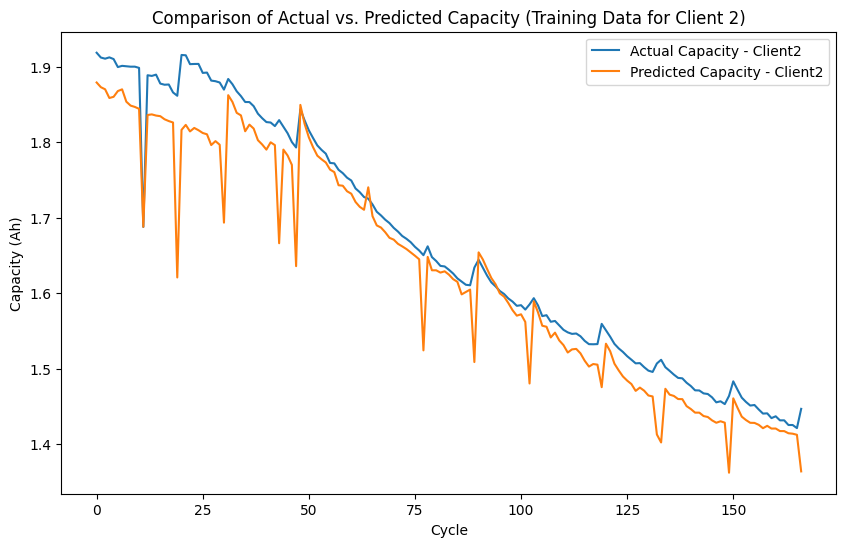

RMSE: 0.0489
MAE: 0.0343


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Y_Train_Client2, label='Actual Capacity - Client2')
plt.plot(Y_pred_Client2, label='Predicted Capacity - Client2')
plt.xlabel('Cycle')
plt.ylabel('Capacity (Ah)')
plt.title('Comparison of Actual vs. Predicted Capacity (Training Data for Client 2)')
plt.legend()
plt.show()

# Calculate metrics like RMSE and MAE for further analysis
rmse = np.sqrt(mean_squared_error(Y_Train_Client2, Y_pred_Client2))
mae = mean_absolute_error(Y_Train_Client2, Y_pred_Client2)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

CLIENT 3

In [ ]:
# Create X and Y using B018 data
X_Train_Client3 = X_list_B018
Y_Train_Client3 = Y_list_B018
print(X_Train_Client3.shape)
print(Y_Train_Client3.shape)

(131, 512, 2)
(131,)


In [ ]:
autoencoder_Client3 = Autoencoder()
autoencoder_Client3.compile(optimizer='adam', loss=losses.MeanSquaredError())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv_transpose.py:94: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
# Autoencoder
autoencoder_Client3.fit(X_Train_Client3, X_Train_Client3,
                epochs=200, batch_size=5,
                shuffle=False)

Epoch 1/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4221
Epoch 2/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1637
Epoch 3/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0493
Epoch 4/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0391
Epoch 5/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0378
Epoch 6/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0372
Epoch 7/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0368
Epoch 8/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0364
Epoch 9/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0361
Epoch 10/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0358
Epoch 11/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0355
Epoch 12/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0352
Epoch 13/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0349
Epoch 14/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0344
Epoch 15/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0332
Epoc

In [ ]:
encoded_imgs_Client3 = autoencoder_Client3.encoder(X_Train_Client3).numpy()
decoded_imgs_Client3 = autoencoder_Client3.decoder(encoded_imgs_Client3).numpy()

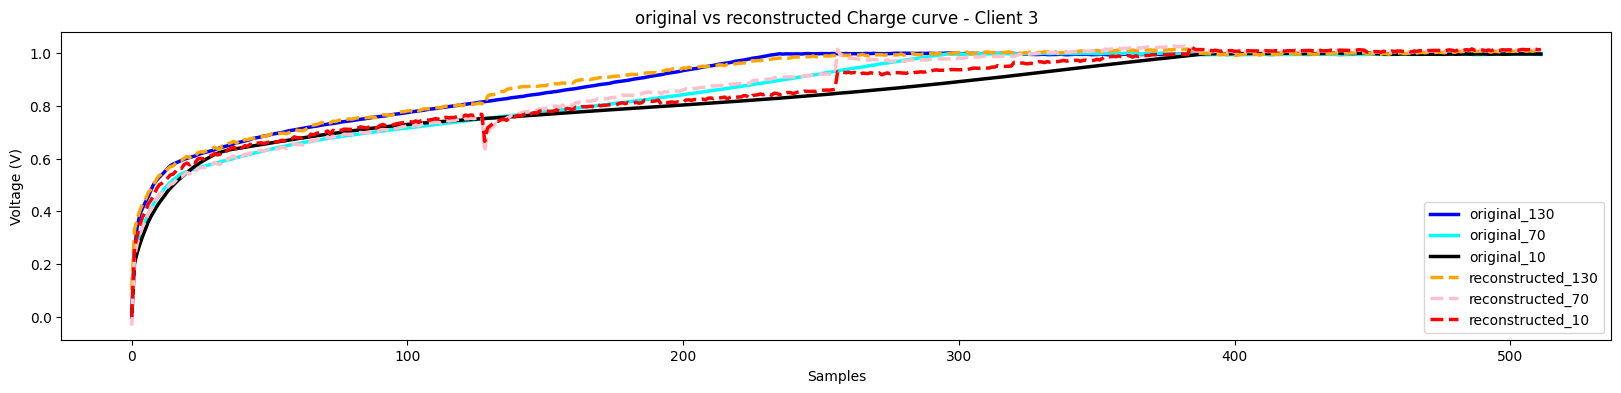

In [ ]:
plt.figure(figsize=(20, 4))
plt.plot(X_Train_Client3[130, :, 0],color='blue', linewidth=2.5)
plt.plot(X_Train_Client3[70, :, 0],color='cyan', linewidth=2.5)
plt.plot(X_Train_Client3[10, :, 0],color='black', linewidth=2.5)
plt.gray()
plt.plot(decoded_imgs_Client3[130, :, 0], '--', color='orange', linewidth=2.5)
plt.plot(decoded_imgs_Client3[70, :, 0], '--', color='pink', linewidth=2.5)
plt.plot(decoded_imgs_Client3[10, :, 0], '--', color='red', linewidth=2.5)
plt.title("original vs reconstructed Charge curve - Client 3")
plt.legend(['original_130','original_70','original_10', 'reconstructed_130','reconstructed_70','reconstructed_10'])
plt.xlabel('Samples')
plt.ylabel('Voltage (V)')
plt.gray()
plt.show()

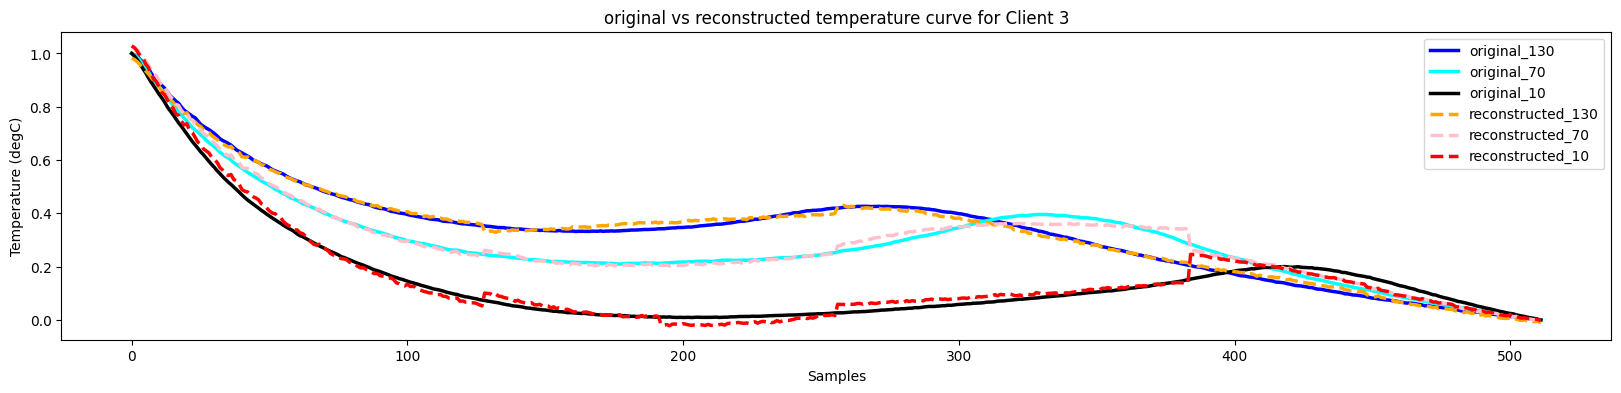

In [ ]:
plt.figure(figsize=(20, 4))
plt.plot(X_Train_Client3[130, :, 1], color='blue', linewidth=2.5)
plt.plot(X_Train_Client3[70, :, 1], color='cyan', linewidth=2.5)
plt.plot(X_Train_Client3[10, :, 1], color='black', linewidth=2.5)
plt.gray()
plt.plot(decoded_imgs_Client3[130, :, 1], '--', color='orange', linewidth=2.5)
plt.plot(decoded_imgs_Client3[70, :, 1], '--', color='pink', linewidth=2.5)
plt.plot(decoded_imgs_Client3[10, :, 1], '--', color='red', linewidth=2.5)
plt.title("original vs reconstructed temperature curve for Client 3")
plt.legend(['original_130','original_70','original_10', 'reconstructed_130','reconstructed_70','reconstructed_10'])
plt.xlabel('Samples')
plt.ylabel('Temperature (degC)')
plt.gray()
plt.show()

In [ ]:
X_Train_Client3 = encoded_imgs_Client3
Y_Train_Client3 = Y_Train_Client3
print(X_Train_Client3.shape)
print(Y_Train_Client3.shape)

(131, 4, 32)
(131,)


In [ ]:
# Base GRU model
Base_GRU_model3 = Sequential()
Base_GRU_model3.add(GRU(units=128, return_sequences=True, input_shape=(X_Train_Client3.shape[1], X_Train_Client3.shape[2])))
Base_GRU_model3.add(GRU(units=128, return_sequences=True))
Base_GRU_model3.add(GRU(units=128))
Base_GRU_model3.add(Dropout(0.5))
Base_GRU_model3.add(Dense(1)) # Output Layer

# Compile the Base model, since the Adaboost Regressor wrapper needs a compiled model.
optimizer = Adam(learning_rate=0.001)
Base_GRU_model3.compile(optimizer=optimizer, loss=MeanSquaredError(), metrics=[tf.keras.metrics.RootMeanSquaredError()])

#Wrapper
gru_regressor3 = KerasRegressor(build_fn= Base_GRU_model3,
                               epochs=200,
                               batch_size=256,
                               verbose=1)
# GRU base model + adaboost
model3 = AdaBoostRegressor(estimator= gru_regressor3, n_estimators=5, learning_rate=1, random_state = 21)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model3.fit(X_Train_Client3, Y_Train_Client3)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 24 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2.7283 - root_mean_squared_error: 1.6518
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 1.9593 - root_mean_squared_error: 1.3998
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 1.3853 - root_mean_squared_error: 1.1770
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.8433 - root_mean_squared_error: 0.9183
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.3892 - root_mean_squared_error: 0.6239
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 0.1068 - root_mean_squared_error: 0.3268
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.1416 - root_mean_squared_error: 0.3763
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.4067 - root_mean_squared_error: 0.6377
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.4864 - root_mean_squared_error: 0.6974
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.3129 - root_mean_squared_error: 0.5593
Epoch 11/200
1/1 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 24 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 2.7855 - root_mean_squared_error: 1.6690
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 1.9979 - root_mean_squared_error: 1.4135
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 1.3994 - root_mean_squared_error: 1.1830
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.8317 - root_mean_squared_error: 0.9120
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.3990 - root_mean_squared_error: 0.6317
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.1141 - root_mean_squared_error: 0.3377
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1480 - root_mean_squared_error: 0.3847
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.4109 - root_mean_squared_error: 0.6410
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.4466 - root_mean_squared_error: 0.6683
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.2974 - root_mean_squared_error: 0.5454
Epoch 11/200
1/1 ━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 24 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 2.7689 - root_mean_squared_error: 1.6640
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 2.0449 - root_mean_squared_error: 1.4300
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 1.4048 - root_mean_squared_error: 1.1853
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.8595 - root_mean_squared_error: 0.9271
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.3996 - root_mean_squared_error: 0.6321
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.1187 - root_mean_squared_error: 0.3445
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.1547 - root_mean_squared_error: 0.3933
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 0.4173 - root_mean_squared_error: 0.6460
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - loss: 0.4273 - root_mean_squared_error: 0.6537
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 0.3778 - root_mean_squared_error: 0.6147
Epoch 11/200
1/1 

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 24 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2.7043 - root_mean_squared_error: 1.6445
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 1.9613 - root_mean_squared_error: 1.4005
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 1.3621 - root_mean_squared_error: 1.1671
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.8348 - root_mean_squared_error: 0.9137
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.3823 - root_mean_squared_error: 0.6183
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.1230 - root_mean_squared_error: 0.3508
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.1571 - root_mean_squared_error: 0.3964
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - loss: 0.3987 - root_mean_squared_error: 0.6314
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.3956 - root_mean_squared_error: 0.6289
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - loss: 0.3375 - root_mean_squared_error: 0.5809
Epoch 11/200
1/1

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 24 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2.7635 - root_mean_squared_error: 1.6624
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 2.0524 - root_mean_squared_error: 1.4326
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 1.4539 - root_mean_squared_error: 1.2058
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.8828 - root_mean_squared_error: 0.9396
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.4328 - root_mean_squared_error: 0.6579
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1418 - root_mean_squared_error: 0.3766
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.1500 - root_mean_squared_error: 0.3874
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.4177 - root_mean_squared_error: 0.6463
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 0.5045 - root_mean_squared_error: 0.7103
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.3268 - root_mean_squared_error: 0.5716
Epoch 11/200
1/1 ━━━━━

AdaBoostRegressor(estimator=KerasRegressor(batch_size=256, build_fn=<Sequential name=sequential_10, built=True>, epochs=200),
                  learning_rate=1, n_estimators=5, random_state=21)

In [ ]:
estimator_weights = model3.estimator_weights_
estimator_weights

array([1.28475414, 0.35800021, 0.95817979, 0.663368  , 0.47233176])

In [ ]:
Y_pred_Client3 = model3.predict(X_Train_Client3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


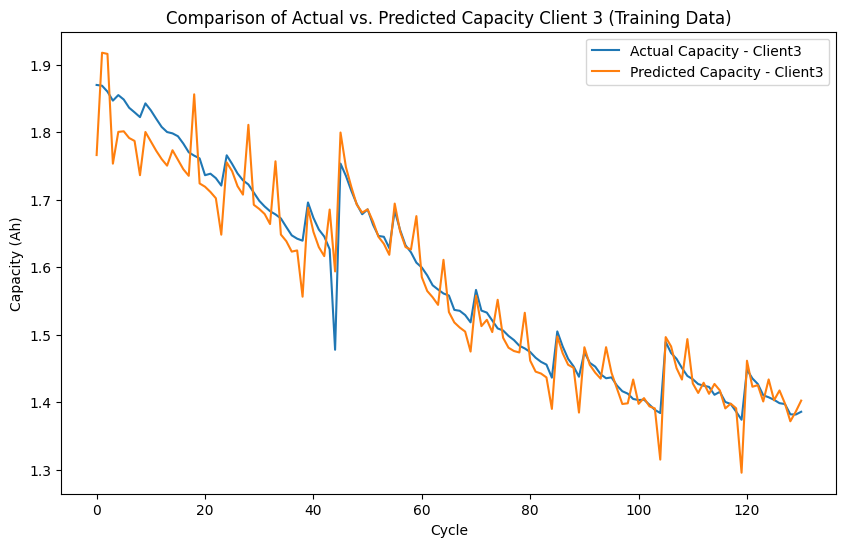

RMSE: 0.0357
MAE: 0.0258


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Y_Train_Client3, label='Actual Capacity - Client3')
plt.plot(Y_pred_Client3, label='Predicted Capacity - Client3')
plt.xlabel('Cycle')
plt.ylabel('Capacity (Ah)')
plt.title('Comparison of Actual vs. Predicted Capacity Client 3 (Training Data)')
plt.legend()
plt.show()

# Calculate metrics like RMSE and MAE for further analysis
rmse = np.sqrt(mean_squared_error(Y_Train_Client3, Y_pred_Client3))
mae = mean_absolute_error(Y_Train_Client3, Y_pred_Client3)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

SERVER

In [ ]:
y_p11 = model1.predict(X_Train_Client1)
Y_p12 = model2.predict(X_Train_Client1)
Y_p13 = model3.predict(X_Train_Client1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [ ]:
average_capacity_1 = np.mean([y_p11, Y_p12, Y_p13], axis=0)


In [ ]:
y_p21 = model1.predict(X_Train_Client2)
Y_p22 = model2.predict(X_Train_Client2)
Y_p23 = model3.predict(X_Train_Client2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [ ]:
average_capacity_2 = np.mean([y_p21, Y_p22, Y_p23], axis=0)

In [ ]:
y_p31 = model1.predict(X_Train_Client3)
Y_p32 = model2.predict(X_Train_Client3)
Y_p33 = model3.predict(X_Train_Client3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [ ]:
average_capacity_3 = np.mean([y_p31, Y_p32, Y_p33], axis=0)

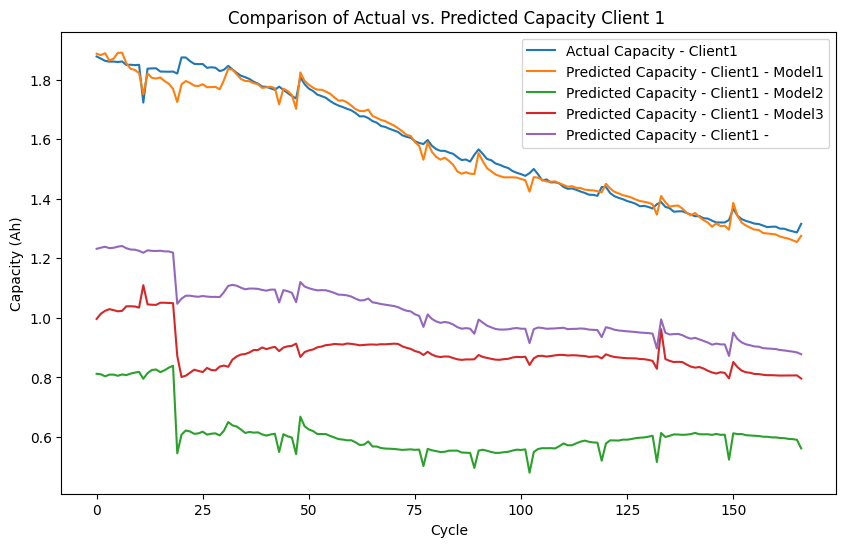

Client1 Data Predicted with Model1
RMSE: 0.0292
MAE: 0.0225
Client1 Data Predicted with Model2
RMSE: 0.9851
MAE: 0.9704
Client1 Data Predicted with Model3
RMSE: 0.7168
MAE: 0.6974
Client1 Data Predicted with Federated Model
RMSE: 0.5706
MAE: 0.5593


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Y_Train_Client1, label='Actual Capacity - Client1')
plt.plot(y_p11, label='Predicted Capacity - Client1 - Model1')
plt.plot(Y_p12, label='Predicted Capacity - Client1 - Model2')
plt.plot(Y_p13, label='Predicted Capacity - Client1 - Model3')
plt.plot(average_capacity_1, label='Predicted Capacity - Client1 - ')

plt.xlabel('Cycle')
plt.ylabel('Capacity (Ah)')
plt.title('Comparison of Actual vs. Predicted Capacity Client 1 ')
plt.legend()
plt.show()

# Calculate metrics like RMSE and MAE for further analysis
rmse = np.sqrt(mean_squared_error(Y_Train_Client1, y_p11))
mae = mean_absolute_error(Y_Train_Client1, y_p11)

print(f"Client1 Data Predicted with Model1")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Calculate metrics like RMSE and MAE for further analysis
rmse = np.sqrt(mean_squared_error(Y_Train_Client1, Y_p12))
mae = mean_absolute_error(Y_Train_Client1, Y_p12)

print(f"Client1 Data Predicted with Model2")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Calculate metrics like RMSE and MAE for further analysis
rmse = np.sqrt(mean_squared_error(Y_Train_Client1, Y_p13))
mae = mean_absolute_error(Y_Train_Client1, Y_p13)

print(f"Client1 Data Predicted with Model3")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Calculate metrics like RMSE and MAE for further analysis
rmse = np.sqrt(mean_squared_error(Y_Train_Client1, average_capacity_1))
mae = mean_absolute_error(Y_Train_Client1, average_capacity_1)

print(f"Client1 Data Predicted with Federated Model")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

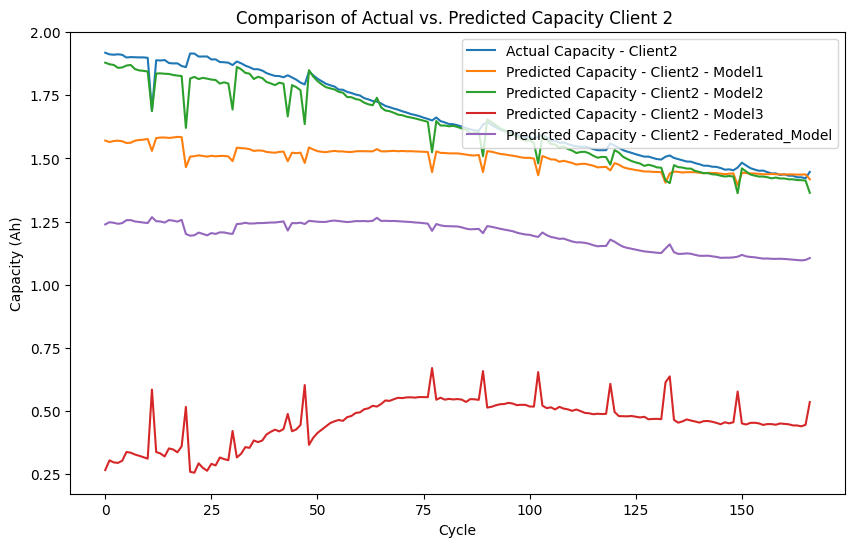

Client2 Data Predicted with Model1
RMSE: 0.2081
MAE: 0.1664
Client2 Data Predicted with Model2
RMSE: 0.0489
MAE: 0.0343
Client2 Data Predicted with Model3
RMSE: 1.2271
MAE: 1.2063
Client2 Data Predicted with Federated Model
RMSE: 0.4837
MAE: 0.4685


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Y_Train_Client2, label='Actual Capacity - Client2')
plt.plot(y_p21, label='Predicted Capacity - Client2 - Model1')
plt.plot(Y_p22, label='Predicted Capacity - Client2 - Model2')
plt.plot(Y_p23, label='Predicted Capacity - Client2 - Model3')
plt.plot(average_capacity_2, label='Predicted Capacity - Client2 - Federated_Model')
plt.xlabel('Cycle')
plt.ylabel('Capacity (Ah)')
plt.title('Comparison of Actual vs. Predicted Capacity Client 2 ')
plt.legend()
plt.show()

# Calculate metrics like RMSE and MAE for further analysis
rmse = np.sqrt(mean_squared_error(Y_Train_Client2, y_p21))
mae = mean_absolute_error(Y_Train_Client2, y_p21)

print(f"Client2 Data Predicted with Model1")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Calculate metrics like RMSE and MAE for further analysis
rmse = np.sqrt(mean_squared_error(Y_Train_Client2, Y_p22))
mae = mean_absolute_error(Y_Train_Client2, Y_p22)

print(f"Client2 Data Predicted with Model2")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Calculate metrics like RMSE and MAE for further analysis
rmse = np.sqrt(mean_squared_error(Y_Train_Client2, Y_p23))
mae = mean_absolute_error(Y_Train_Client2, Y_p23)

print(f"Client2 Data Predicted with Model3")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Calculate metrics like RMSE and MAE for further analysis
rmse = np.sqrt(mean_squared_error(Y_Train_Client2, average_capacity_2))
mae = mean_absolute_error(Y_Train_Client2, average_capacity_2)

print(f"Client2 Data Predicted with Federated Model")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

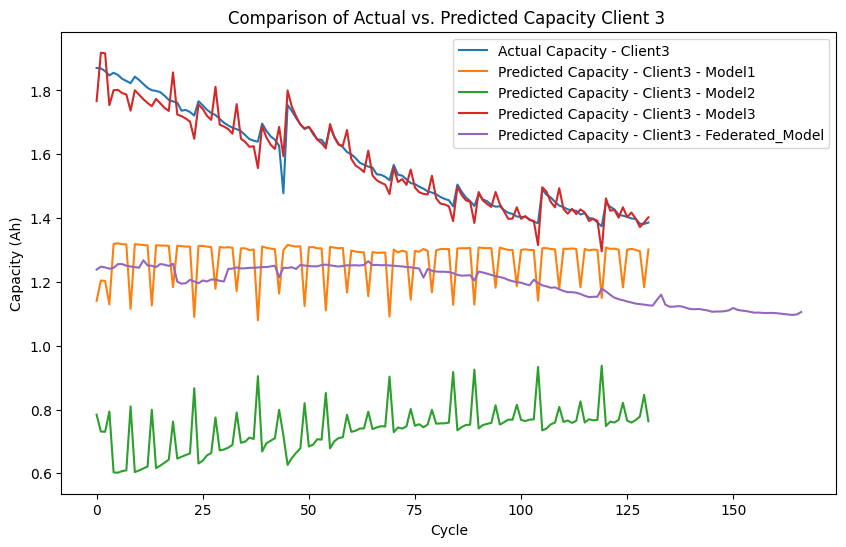

Client3 Data Predicted with Model1
RMSE: 0.3516
MAE: 0.3103
Client3 Data Predicted with Model2
RMSE: 0.8666
MAE: 0.8427
Client3 Data Predicted with Model3
RMSE: 0.0357
MAE: 0.0258
Client3 Data Predicted with Federated Model
RMSE: 0.4050
MAE: 0.3873


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Y_Train_Client3, label='Actual Capacity - Client3')
plt.plot(y_p31, label='Predicted Capacity - Client3 - Model1')
plt.plot(Y_p32, label='Predicted Capacity - Client3 - Model2')
plt.plot(Y_p33, label='Predicted Capacity - Client3 - Model3')
plt.plot(average_capacity_2, label='Predicted Capacity - Client3 - Federated_Model')
plt.xlabel('Cycle')
plt.ylabel('Capacity (Ah)')
plt.title('Comparison of Actual vs. Predicted Capacity Client 3 ')
plt.legend()
plt.show()

# Calculate metrics like RMSE and MAE for further analysis
rmse = np.sqrt(mean_squared_error(Y_Train_Client3, y_p31))
mae = mean_absolute_error(Y_Train_Client3, y_p31)

print(f"Client3 Data Predicted with Model1")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Calculate metrics like RMSE and MAE for further analysis
rmse = np.sqrt(mean_squared_error(Y_Train_Client3, Y_p32))
mae = mean_absolute_error(Y_Train_Client3, Y_p32)

print(f"Client3 Data Predicted with Model2")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Calculate metrics like RMSE and MAE for further analysis
rmse = np.sqrt(mean_squared_error(Y_Train_Client3, Y_p33))
mae = mean_absolute_error(Y_Train_Client3, Y_p33)

print(f"Client3 Data Predicted with Model3")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Calculate metrics like RMSE and MAE for further analysis
rmse = np.sqrt(mean_squared_error(Y_Train_Client3, average_capacity_3))
mae = mean_absolute_error(Y_Train_Client3, average_capacity_3)

print(f"Client3 Data Predicted with Federated Model")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

Validation on Test data

In [ ]:
# Create X and Y using B018 data
X_Test = X_list_B006
Y_Test = Y_list_B006
print(X_Test.shape)
print(Y_Test.shape)

(167, 512, 2)
(167,)


In [ ]:
autoencoder_Test = Autoencoder()
autoencoder_Test.compile(optimizer='adam', loss=losses.MeanSquaredError())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv_transpose.py:94: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
# Autoencoder
autoencoder_Test.fit(X_Test, X_Test,
                epochs=200, batch_size=5,
                shuffle=False)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4402
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1103
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0446
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0421
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0415
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0405
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0395
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0380
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0367
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0344
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0302
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0228
Epoch 13/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0183
Epoch 14/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0166
Epoch 15/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0156
Epoc

In [ ]:
encoded_imgs_Test = autoencoder_Test.encoder(X_Test).numpy()
decoded_imgs_Test = autoencoder_Test.decoder(encoded_imgs_Test).numpy()

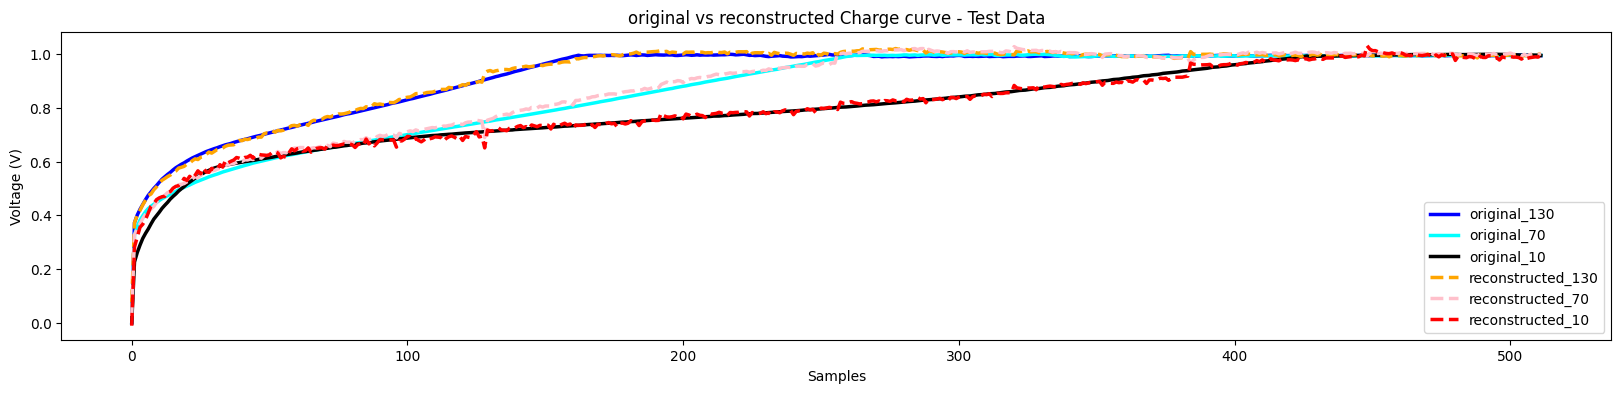

In [ ]:
plt.figure(figsize=(20, 4))
plt.plot(X_Test[130, :, 0],color='blue', linewidth=2.5)
plt.plot(X_Test[70, :, 0],color='cyan', linewidth=2.5)
plt.plot(X_Test[10, :, 0],color='black', linewidth=2.5)
plt.gray()
plt.plot(decoded_imgs_Test[130, :, 0], '--', color='orange', linewidth=2.5)
plt.plot(decoded_imgs_Test[70, :, 0], '--', color='pink', linewidth=2.5)
plt.plot(decoded_imgs_Test[10, :, 0], '--', color='red', linewidth=2.5)
plt.title("original vs reconstructed Charge curve - Test Data")
plt.legend(['original_130','original_70','original_10', 'reconstructed_130','reconstructed_70','reconstructed_10'])
plt.xlabel('Samples')
plt.ylabel('Voltage (V)')
plt.gray()
plt.show()

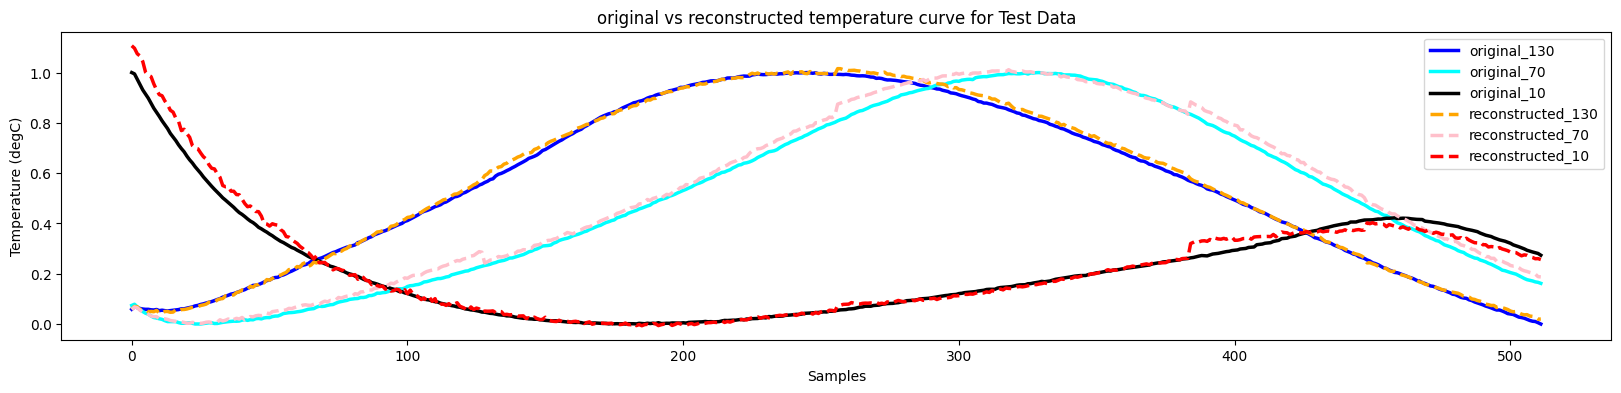

In [ ]:
plt.figure(figsize=(20, 4))
plt.plot(X_Test[130, :, 1], color='blue', linewidth=2.5)
plt.plot(X_Test[70, :, 1], color='cyan', linewidth=2.5)
plt.plot(X_Test[10, :, 1], color='black', linewidth=2.5)
plt.gray()
plt.plot(decoded_imgs_Test[130, :, 1], '--', color='orange', linewidth=2.5)
plt.plot(decoded_imgs_Test[70, :, 1], '--', color='pink', linewidth=2.5)
plt.plot(decoded_imgs_Test[10, :, 1], '--', color='red', linewidth=2.5)
plt.title("original vs reconstructed temperature curve for Test Data")
plt.legend(['original_130','original_70','original_10', 'reconstructed_130','reconstructed_70','reconstructed_10'])
plt.xlabel('Samples')
plt.ylabel('Temperature (degC)')
plt.gray()
plt.show()

In [ ]:
X_Test = encoded_imgs_Test
Y_Test = Y_Test
print(X_Test.shape)
print(Y_Test.shape)

(167, 4, 32)
(167,)


In [ ]:
Y_p_test1 = model1.predict(X_Test)
Y_p_test2 = model2.predict(X_Test)
Y_p_test3 = model3.predict(X_Test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [ ]:
average_capacity_test = np.mean([Y_p_test1, Y_p_test2, Y_p_test3], axis=0)

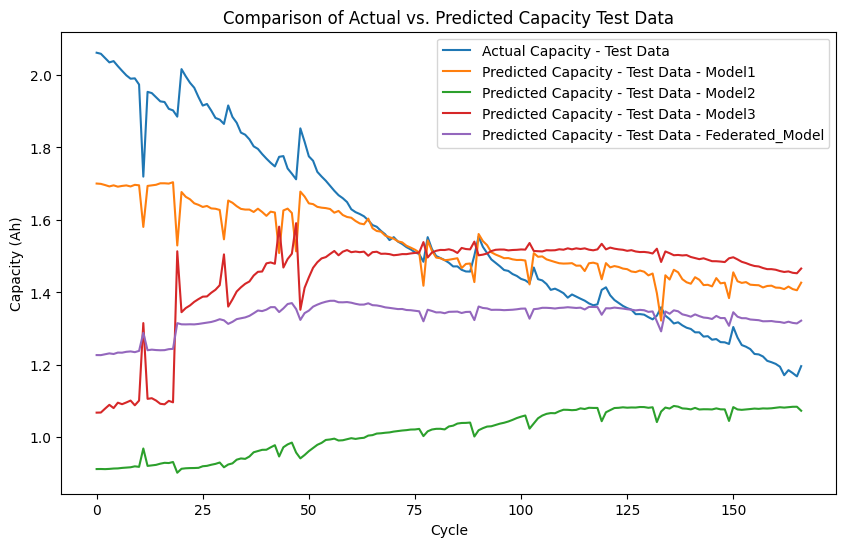

Test Data Predicted with Model1
RMSE: 0.1677
MAE: 0.1335
Test Data Predicted with Model2
RMSE: 0.6326
MAE: 0.5493
Test Data Predicted with Model3
RMSE: 0.3752
MAE: 0.2720
Test Data Predicted with Federated Model
RMSE: 0.3597
MAE: 0.2622


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Y_Test, label='Actual Capacity - Test Data')
plt.plot(Y_p_test1, label='Predicted Capacity - Test Data - Model1')
plt.plot(Y_p_test2, label='Predicted Capacity - Test Data - Model2')
plt.plot(Y_p_test3, label='Predicted Capacity - Test Data - Model3')
plt.plot(average_capacity_test, label='Predicted Capacity - Test Data - Federated_Model')
plt.xlabel('Cycle')
plt.ylabel('Capacity (Ah)')
plt.title('Comparison of Actual vs. Predicted Capacity Test Data')
plt.legend()
plt.show()

# Calculate metrics like RMSE and MAE for further analysis
rmse = np.sqrt(mean_squared_error(Y_Test, Y_p_test1))
mae = mean_absolute_error(Y_Test, Y_p_test1)

print(f"Test Data Predicted with Model1")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Calculate metrics like RMSE and MAE for further analysis
rmse = np.sqrt(mean_squared_error(Y_Test, Y_p_test2))
mae = mean_absolute_error(Y_Test, Y_p_test2)

print(f"Test Data Predicted with Model2")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Calculate metrics like RMSE and MAE for further analysis
rmse = np.sqrt(mean_squared_error(Y_Test, Y_p_test3))
mae = mean_absolute_error(Y_Test, Y_p_test3)

print(f"Test Data Predicted with Model3")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Calculate metrics like RMSE and MAE for further analysis
rmse = np.sqrt(mean_squared_error(Y_Test, average_capacity_test))
mae = mean_absolute_error(Y_Test, average_capacity_test)

print(f"Test Data Predicted with Federated Model")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

In [ ]:
y_p11_first = np.ones(len(Y_p12))* y_p11[0]
print(len(y_p11_first))
y_p12_first = np.ones(len(Y_p12))* Y_p12[0]
print(len(y_p12_first))
y_p13_first = np.ones(len(Y_p13))* Y_p13[0]
print(len(y_p13_first))
avg_1_first = np.ones(len(average_capacity_1))* average_capacity_1[0]
print(len(avg_1_first))

167
167
167
167


In [ ]:
delta_12 = y_p11_first - y_p12_first
delta_13 = y_p11_first - y_p13_first
delta_avg1 = y_p11_first - avg_1_first

y = mx + c2 + (-c2 + c1)

In [ ]:
Y_p12_updated = Y_p12 + delta_12
Y_p13_updated = Y_p13 + delta_13
average_capacity_1_updated = average_capacity_1 + delta_avg1

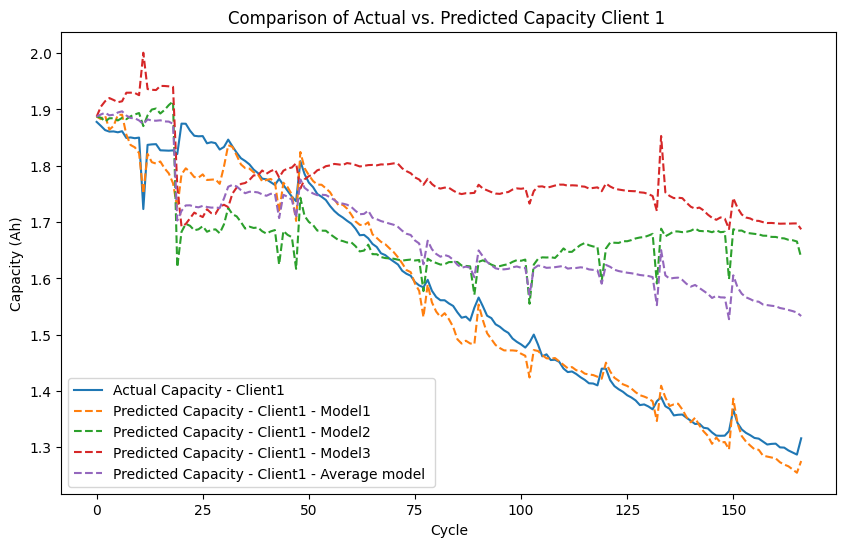

Client1 Data Predicted with Model1
RMSE: 0.0292
MAE: 0.0225
Client1 Data Predicted with Model2
RMSE: 0.1992
MAE: 0.1595
Client1 Data Predicted with Model3
RMSE: 0.2544
MAE: 0.2174
Client1 Data Predicted with Average Model
RMSE: 0.1483
MAE: 0.1225


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Y_Train_Client1, label='Actual Capacity - Client1')
plt.plot(y_p11, '--',label='Predicted Capacity - Client1 - Model1')
plt.plot(Y_p12_updated, '--',label='Predicted Capacity - Client1 - Model2')
plt.plot(Y_p13_updated, '--',label='Predicted Capacity - Client1 - Model3')
plt.plot(average_capacity_1_updated, '--', label='Predicted Capacity - Client1 - Average model ')

plt.xlabel('Cycle')
plt.ylabel('Capacity (Ah)')
plt.title('Comparison of Actual vs. Predicted Capacity Client 1 ')
plt.legend()
plt.show()

# Calculate metrics like RMSE and MAE for further analysis
rmse = np.sqrt(mean_squared_error(Y_Train_Client1, y_p11))
mae = mean_absolute_error(Y_Train_Client1, y_p11)

print(f"Client1 Data Predicted with Model1")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Calculate metrics like RMSE and MAE for further analysis
rmse = np.sqrt(mean_squared_error(Y_Train_Client1, Y_p12_updated))
mae = mean_absolute_error(Y_Train_Client1, Y_p12_updated)

print(f"Client1 Data Predicted with Model2")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Calculate metrics like RMSE and MAE for further analysis
rmse = np.sqrt(mean_squared_error(Y_Train_Client1, Y_p13_updated))
mae = mean_absolute_error(Y_Train_Client1, Y_p13_updated)

print(f"Client1 Data Predicted with Model3")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Calculate metrics like RMSE and MAE for further analysis
rmse = np.sqrt(mean_squared_error(Y_Train_Client1, average_capacity_1_updated))
mae = mean_absolute_error(Y_Train_Client1, average_capacity_1_updated)

print(f"Client1 Data Predicted with Average Model")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

In [ ]:
y_p21_first = np.ones(len(y_p21))* y_p21[0]
print(len(y_p21_first))
y_p22_first = np.ones(len(Y_p22))* Y_p22[0]
print(len(y_p22_first))
y_p23_first = np.ones(len(Y_p23))* Y_p23[0]
print(len(y_p23_first))
avg_2_first = np.ones(len(average_capacity_2))* average_capacity_2[0]
print(len(avg_2_first))

167
167
167
167


In [ ]:
delta_21 = y_p22_first - y_p21_first
delta_23 = y_p22_first - y_p23_first
delta_avg2 = y_p22_first - avg_2_first

In [ ]:
Y_p21_updated = y_p21 + delta_21
Y_p23_updated = Y_p23 + delta_23
average_capacity_2_updated = average_capacity_2 + delta_avg2

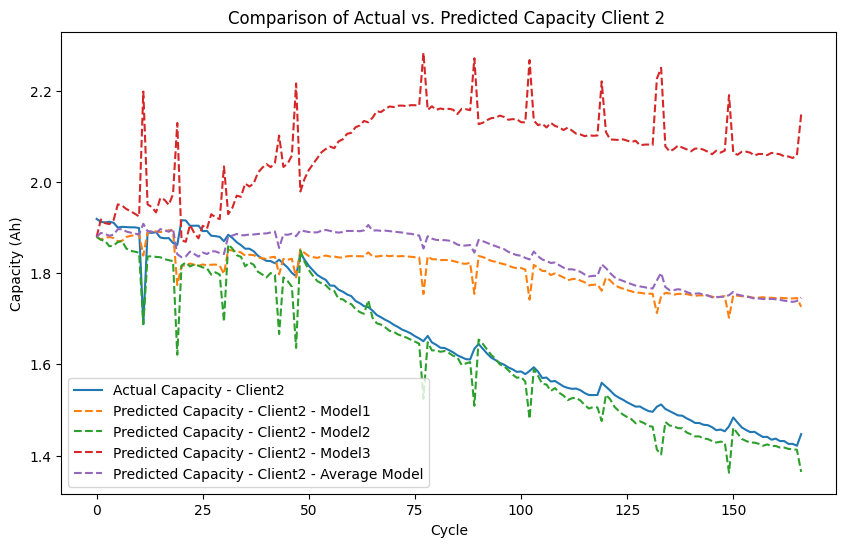

Client2 Data Predicted with Model1
RMSE: 0.1902
MAE: 0.1598
Client2 Data Predicted with Model2
RMSE: 0.0489
MAE: 0.0343
Client2 Data Predicted with Model3
RMSE: 0.4649
MAE: 0.4090
Client2 Data Predicted with Average Model
RMSE: 0.2097
MAE: 0.1816


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Y_Train_Client2, label='Actual Capacity - Client2')
plt.plot(Y_p21_updated, '--', label='Predicted Capacity - Client2 - Model1')
plt.plot(Y_p22, '--',label='Predicted Capacity - Client2 - Model2')
plt.plot(Y_p23_updated, '--',label='Predicted Capacity - Client2 - Model3')
plt.plot(average_capacity_2_updated, '--',label='Predicted Capacity - Client2 - Average Model')
plt.xlabel('Cycle')
plt.ylabel('Capacity (Ah)')
plt.title('Comparison of Actual vs. Predicted Capacity Client 2 ')
plt.legend()
plt.show()

# Calculate metrics like RMSE and MAE for further analysis
rmse = np.sqrt(mean_squared_error(Y_Train_Client2, Y_p21_updated))
mae = mean_absolute_error(Y_Train_Client2, Y_p21_updated)

print(f"Client2 Data Predicted with Model1")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Calculate metrics like RMSE and MAE for further analysis
rmse = np.sqrt(mean_squared_error(Y_Train_Client2, Y_p22))
mae = mean_absolute_error(Y_Train_Client2, Y_p22)

print(f"Client2 Data Predicted with Model2")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Calculate metrics like RMSE and MAE for further analysis
rmse = np.sqrt(mean_squared_error(Y_Train_Client2, Y_p23_updated))
mae = mean_absolute_error(Y_Train_Client2, Y_p23_updated)

print(f"Client2 Data Predicted with Model3")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Calculate metrics like RMSE and MAE for further analysis
rmse = np.sqrt(mean_squared_error(Y_Train_Client2, average_capacity_2_updated))
mae = mean_absolute_error(Y_Train_Client2, average_capacity_2_updated)

print(f"Client2 Data Predicted with Average Model")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

In [ ]:
y_p31_first = np.ones(len(y_p31))* y_p31[0]
print(len(y_p31_first))
y_p32_first = np.ones(len(Y_p32))* Y_p32[0]
print(len(y_p32_first))
y_p33_first = np.ones(len(Y_p33))* Y_p33[0]
print(len(y_p33_first))
avg_3_first = np.ones(len(average_capacity_3))* average_capacity_3[0]
print(len(avg_3_first))

131
131
131
131


In [ ]:
delta_31 = y_p33_first - y_p31_first
delta_32 = y_p33_first - y_p32_first
delta_avg3 = y_p33_first - avg_3_first

In [ ]:
Y_p31_updated = y_p31 + delta_31
Y_p32_updated = Y_p32 + delta_32
average_capacity_3_updated = average_capacity_3 + delta_avg3

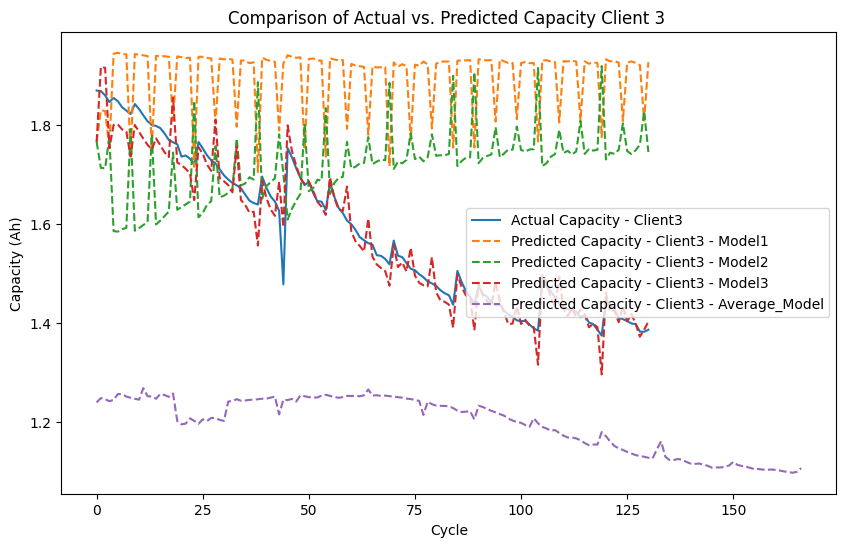

Client3 Data Predicted with Model1
RMSE: 0.3563
MAE: 0.3217
Client3 Data Predicted with Model2
RMSE: 0.2457
MAE: 0.2108
Client3 Data Predicted with Model3
RMSE: 0.0357
MAE: 0.0258
Client3 Data Predicted with Average Model
RMSE: 0.1903
MAE: 0.1632


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Y_Train_Client3, label='Actual Capacity - Client3')
plt.plot(Y_p31_updated, '--',label='Predicted Capacity - Client3 - Model1')
plt.plot(Y_p32_updated, '--',label='Predicted Capacity - Client3 - Model2')
plt.plot(Y_p33, '--',label='Predicted Capacity - Client3 - Model3')
plt.plot(average_capacity_2, '--',label='Predicted Capacity - Client3 - Average_Model')
plt.xlabel('Cycle')
plt.ylabel('Capacity (Ah)')
plt.title('Comparison of Actual vs. Predicted Capacity Client 3 ')
plt.legend()
plt.show()

# Calculate metrics like RMSE and MAE for further analysis
rmse = np.sqrt(mean_squared_error(Y_Train_Client3, Y_p31_updated))
mae = mean_absolute_error(Y_Train_Client3, Y_p31_updated)

print(f"Client3 Data Predicted with Model1")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Calculate metrics like RMSE and MAE for further analysis
rmse = np.sqrt(mean_squared_error(Y_Train_Client3, Y_p32_updated))
mae = mean_absolute_error(Y_Train_Client3, Y_p32_updated)

print(f"Client3 Data Predicted with Model2")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Calculate metrics like RMSE and MAE for further analysis
rmse = np.sqrt(mean_squared_error(Y_Train_Client3, Y_p33))
mae = mean_absolute_error(Y_Train_Client3, Y_p33)

print(f"Client3 Data Predicted with Model3")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Calculate metrics like RMSE and MAE for further analysis
rmse = np.sqrt(mean_squared_error(Y_Train_Client3, average_capacity_3_updated))
mae = mean_absolute_error(Y_Train_Client3, average_capacity_3_updated)

print(f"Client3 Data Predicted with Average Model")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

In [ ]:
Y_p_test1_first = np.ones(len(Y_p_test1))* Y_p_test1[0]
print(len(Y_p_test1_first))
Y_p_test2_first = np.ones(len(Y_p_test2))* Y_p_test2[0]
print(len(Y_p_test2_first))
Y_p_test3_first = np.ones(len(Y_p_test3))* Y_p_test3[0]
print(len(Y_p_test3_first))
avg_test_first = np.ones(len(average_capacity_test))* average_capacity_test[0]
print(len(avg_test_first))
Y_Test_first = np.ones(len(Y_Test))* Y_Test[0]
print(len(Y_Test_first))


167
167
167
167
167


In [ ]:
delta_test_1 = Y_Test_first - Y_p_test1_first
delta_test_2 = Y_Test_first - Y_p_test2_first
delta_test_3 = Y_Test_first - Y_p_test3_first
delta_test_avg = Y_Test_first - avg_test_first

In [ ]:
Y_p_test1_updated = Y_p_test1 + delta_test_1
Y_p_test2_updated = Y_p_test2 + delta_test_2
Y_p_test3_updated = Y_p_test3 + delta_test_3
average_capacity_test_updated = average_capacity_test + delta_test_avg

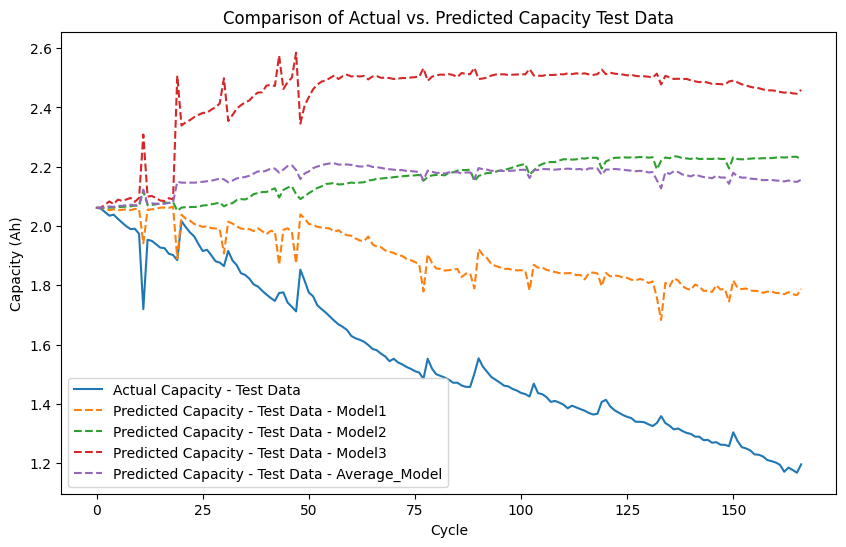

Test Data Predicted with Model1
RMSE: 0.3721
MAE: 0.3333
Test Data Predicted with Model2
RMSE: 0.6768
MAE: 0.5996
Test Data Predicted with Model3
RMSE: 0.9444
MAE: 0.8747
Test Data Predicted with Average Model
RMSE: 0.6623
MAE: 0.6026


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Y_Test, label='Actual Capacity - Test Data')
plt.plot(Y_p_test1_updated, '--',label='Predicted Capacity - Test Data - Model1')
plt.plot(Y_p_test2_updated, '--',label='Predicted Capacity - Test Data - Model2')
plt.plot(Y_p_test3_updated, '--',label='Predicted Capacity - Test Data - Model3')
plt.plot(average_capacity_test_updated, '--',label='Predicted Capacity - Test Data - Average_Model')
plt.xlabel('Cycle')
plt.ylabel('Capacity (Ah)')
plt.title('Comparison of Actual vs. Predicted Capacity Test Data')
plt.legend()
plt.show()

# Calculate metrics like RMSE and MAE for further analysis
rmse = np.sqrt(mean_squared_error(Y_Test, Y_p_test1_updated))
mae = mean_absolute_error(Y_Test, Y_p_test1_updated)

print(f"Test Data Predicted with Model1")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Calculate metrics like RMSE and MAE for further analysis
rmse = np.sqrt(mean_squared_error(Y_Test, Y_p_test2_updated))
mae = mean_absolute_error(Y_Test, Y_p_test2_updated)

print(f"Test Data Predicted with Model2")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Calculate metrics like RMSE and MAE for further analysis
rmse = np.sqrt(mean_squared_error(Y_Test, Y_p_test3_updated))
mae = mean_absolute_error(Y_Test, Y_p_test3_updated)

print(f"Test Data Predicted with Model3")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Calculate metrics like RMSE and MAE for further analysis
rmse = np.sqrt(mean_squared_error(Y_Test, average_capacity_test_updated))
mae = mean_absolute_error(Y_Test, average_capacity_test_updated)

print(f"Test Data Predicted with Average Model")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

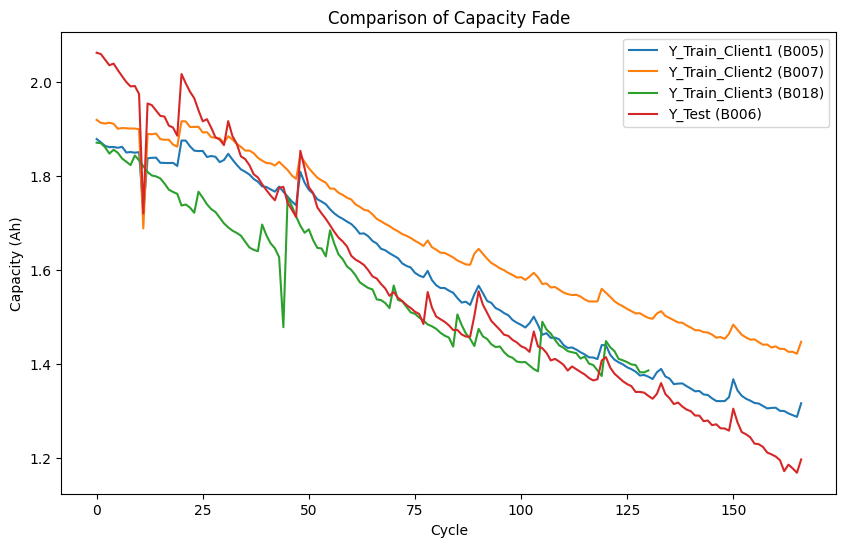

In [6]:
# prompt: plot Y_Train_Client1, Y_Train_Client2, Y_Train_Client3 and Y_Test

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(Y_list_B005, label='Y_Train_Client1 (B005)')
plt.plot(Y_list_B007, label='Y_Train_Client2 (B007)')
plt.plot(Y_list_B018, label='Y_Train_Client3 (B018)')
plt.plot(Y_list_B006, label='Y_Test (B006)')
plt.xlabel('Cycle')
plt.ylabel('Capacity (Ah)')
plt.title('Comparison of Capacity Fade')
plt.legend()
plt.show()